## Extract bubble from simulations

In [3]:
import os,sys
sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/prefactor/bubbles_codes')

from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline


In [163]:
def beautify(ax, ttl=None, bb=None, lens=True):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        if lens:
            aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax

def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax


0.775 0.15 0.28853785471348287 0 1000 1.0000000840229193


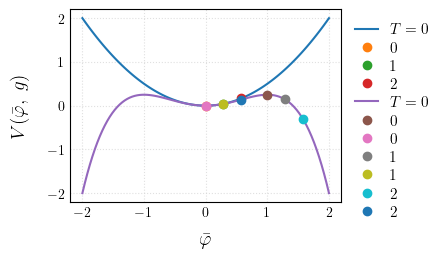

In [5]:
if True:
    philist = np.linspace(-2., 2., 100)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    for tmp in range(len(tempList)):
        temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, m2, temp])
        print(m2, temp, sigmafld, minSim, maxSim, right_Vmax)

        ax.plot(philist, Vfree(philist), label=r'$T={:.0f}$'.format(temp))
        for nn in np.linspace(0, 2, 3):
            ax.plot(nn*sigmafld, Vfree(nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))

        ax.plot(philist, V(philist), label=r'$T={:.0f}$'.format(temp))
        for nn in np.linspace(0, 2, 3):
            ax.plot(right_Vmax + nn*sigmafld, V(right_Vmax + nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))
            ax.plot(nn*sigmafld, V(nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))

    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1))
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [6]:
tmp=0
temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
exp_params = np.asarray([nLat, m2, temp])
print('Experiment', exp_params)

sim = 35
path2sim = sim_location(*exp_params, sim)
print(path2sim)

tdecay, initcond, real, outcome = get_realisation(nLat, sim, path2sim)
real[np.isnan(real)] = 0.
nC, nT, nN    = np.shape(real)

fld, mom, grd = real[0], real[1], real[2]
#energy_data = np.sum(0.5*mom**2. + 0.5*grd**2. + Vfree(fld), axis=-1)
#energy_data = np.sum(0.5*mom**2. + 0.5*grd**2. + Vquar(fld), axis=-1)
TEN_data = np.sum(0.5*mom**2. + 0.5*grd**2. + V(fld), axis=-1)
EMT_data    = np.sum(mom * grd, axis=-1)

init_TEN_data = np.sum(0.5*initcond[1]**2. + 0.5*initcond[2]**2. + V(initcond[0]), axis=-1)
init_EMT_data    = np.sum(initcond[1] * initcond[2], axis=-1)

path2CLEANsim = clean_sim_location(*exp_params, sim)
_, _, _, _, bubble = np.load(path2CLEANsim, allow_pickle=True)

Experiment [4.096e+03 7.750e-01 1.500e-01]
/gpfs/dpirvu/prefactor/x4096_m2eff0.7750_T0.1500_sim35_fields.dat


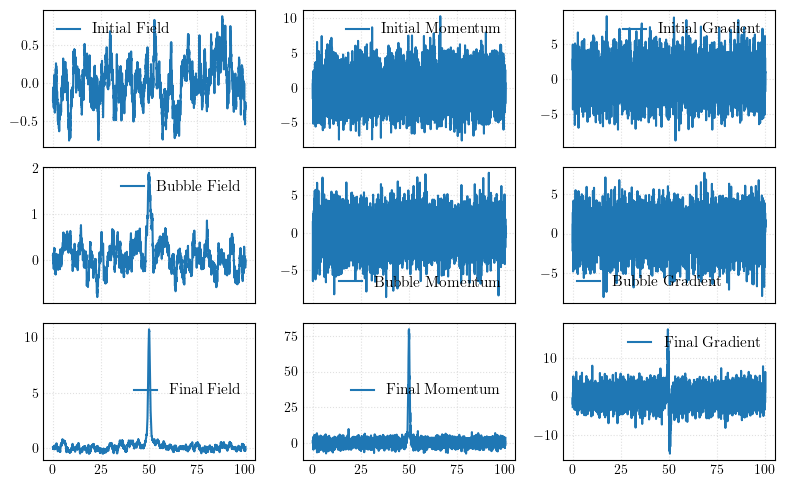

In [7]:
fig, ax = plt.subplots(3, 3, figsize = (8, 5), sharex=True)
ax[0,0].plot(np.arange(nLat)*dx, initcond[0,:],  label=r'$\rm Initial \; Field$')
ax[0,1].plot(np.arange(nLat)*dx, initcond[1,:],  label=r'$\rm Initial \; Momentum$')
ax[0,2].plot(np.arange(nLat)*dx, initcond[2,:],  label=r'$\rm Initial \; Gradient$')
ax[1,0].plot(np.arange(nLat)*dx, bubble[0,1,:],  label=r'$\rm Bubble \; Field$')
ax[1,1].plot(np.arange(nLat)*dx, bubble[1,1,:],  label=r'$\rm Bubble \; Momentum$')
ax[1,2].plot(np.arange(nLat)*dx, bubble[2,1,:],  label=r'$\rm Bubble \; Gradient$')
ax[2,0].plot(np.arange(nLat)*dx, bubble[0,-1,:], label=r'$\rm Final \; Field$')
ax[2,1].plot(np.arange(nLat)*dx, bubble[1,-1,:], label=r'$\rm Final \; Momentum$')
ax[2,2].plot(np.arange(nLat)*dx, bubble[2,-1,:], label=r'$\rm Final \; Gradient$')
beautify(ax)
plt.tight_layout(); plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Shapes, (3, 47, 4096) , (3, 47, 4096)


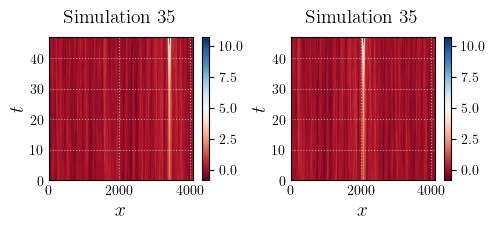

In [8]:
print('Shapes,', np.shape(bubble), ',', np.shape(real))
nC, nT, nN = np.shape(bubble)

fig, ax = plt.subplots(1, 2, figsize = (5, 2.5))
ext = [0, nN, 0, nT]
im  = ax[0].imshow(fld, interpolation='none', aspect='auto', extent=ext, origin='lower', cmap='RdBu')
clb = plt.colorbar(im, ax=ax[0])
im  = ax[1].imshow(bubble[0], interpolation='none', aspect='auto', extent=ext, origin='lower', cmap='RdBu')
clb = plt.colorbar(im, ax=ax[1])
for aa in ax:
    aa.set_title(r'${{\rm Simulation}} \;{:.0f}$'.format(sim))
    aa.set_xlabel(r'$x$')
    aa.set_ylabel(r'$t$')
beautify(ax)
plt.tight_layout(); plt.show()

##### 

In [21]:
undecayed = [40, 70, 76, 83, 119, 197, 209, 224, 262, 322, 340, 357, 452, 462, 494, 518, 602, 614, 616, 636, 654, 724, 743, 748, 788, 816, 895, 899, 950]


In [24]:
len(undecayed)

29

In [23]:
np.array(undecayed)

array([ 40,  70,  76,  83, 119, 197, 209, 224, 262, 322, 340, 357, 452,
       462, 494, 518, 602, 614, 616, 636, 654, 724, 743, 748, 788, 816,
       895, 899, 950])

In [20]:
undecayed_sims[:,0]

array([ 40,  70,  76,  83, 119, 197, 209, 224, 262, 322, 340, 357, 452,
       462, 494, 518, 602, 614, 616, 636, 642, 643, 644, 645, 646, 647,
       648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660,
       661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673,
       674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
       687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,
       724, 743, 748, 788, 816, 848, 849, 850, 851, 852, 853, 854, 855,
       856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868,
       869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881,
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894,
       895, 896, 897, 898, 899, 950])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.775 0.15 0.28853785471348287 0 1000 1.0000000840229193
971


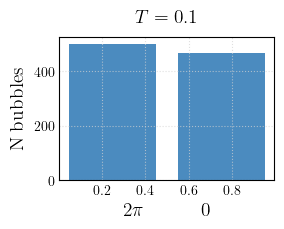

In [25]:
# Classify decays
fig, ax = plt.subplots(1, len(tempList[:1]), figsize = (3,2.5), sharey=True)
cols=cycle(allcolors)
for tmp in range(len(tempList[:1])):
    temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, m2, temp])
    print(m2, temp, sigmafld, minSim, maxSim, right_Vmax)

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decayed_sims   = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    outcomes = decayed_sims[:,1]; print(len(outcomes))

    labs = r'$T={:.1f}$'.format(temp)
    ax.hist(outcomes, density=False, bins=2, rwidth=0.8, color=next(cols), alpha=0.9, linewidth=0.5)
    ax.set_xlabel(r'$2\pi \quad\quad\quad 0$')
    ax.set_ylabel(r'$\rm N \; bubbles$')
    ax.set_title(labs)
beautify(ax)
plt.tight_layout()
plt.savefig('./plots/vacuum_choice.pdf')
plt.show()


0.775 0.15 0.28853785471348287 0 1000 1.0000000840229193


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


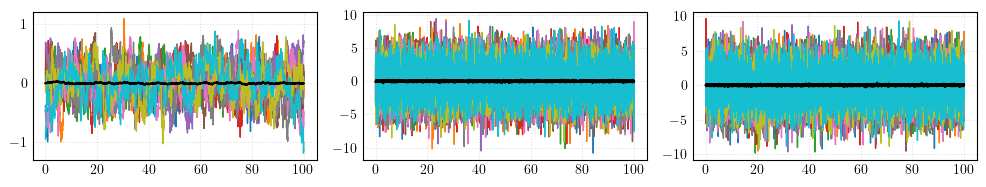

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


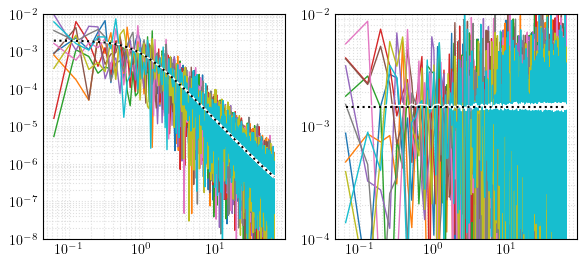

In [66]:
# Check initial conditions
for tmp in range(len(tempList[:1])):
    fig, ax = plt.subplots(1, 3, figsize = (10,2.))
    cols=cycle(allcolors)

    temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, m2, temp])
    print(m2, temp, sigmafld, minSim, maxSim, right_Vmax)
    labs = r'$T={:.1f}$'.format(temp)

    initial_conditions = np.load(init_cond_file(*exp_params, minSim, maxSim, nTimeMAX), allow_pickle=True)
    real_space_fld = initial_conditions[:,1]
    real_space_mom = initial_conditions[:,2]
    real_space_grd = initial_conditions[:,3]
    four_space_fld = initial_conditions[:,4]
    four_space_mom = initial_conditions[:,5]
    four_space_grd = initial_conditions[:,6]

    [ax[0].plot(xlist, real_space_fld[ss], lw=1) for ss in range(minSim,maxSim,100)]
    ax[0].plot(xlist, np.mean(real_space_fld, axis=0), color='k')
    [ax[1].plot(xlist, real_space_mom[ss], lw=1) for ss in range(minSim,maxSim,100)]
    ax[1].plot(xlist, np.mean(real_space_mom, axis=0), color='k')
    [ax[2].plot(xlist, real_space_grd[ss], lw=1) for ss in range(minSim,maxSim,100)]
    ax[2].plot(xlist, np.mean(real_space_grd, axis=0), color='k')
    ax = beautify(ax)
    plt.tight_layout(); plt.show()

    fig, ax = plt.subplots(1, 2, figsize = (6.,2.8))
    cols=cycle(allcolors)

    kmin, kmax = 0, dk*nLat//4
    [ax[0].plot(klist[(klist>kmin)&(klist<kmax)], four_space_fld[ss][(klist>kmin)&(klist<kmax)], lw=1) for ss in range(minSim,maxSim,100)]
    ax[0].plot(klist[(klist>kmin)&(klist<kmax)], np.mean(four_space_fld, axis=0)[(klist>kmin)&(klist<kmax)], color='white', lw=1)
    ax[0].plot(klist[(klist>kmin)&(klist<kmax)], pspec(temp,m2)[(klist>kmin)&(klist<kmax)], ls=':', color='k')

    [ax[1].plot(klist[(klist>kmin)&(klist<kmax)], four_space_mom[ss][(klist>kmin)&(klist<kmax)], lw=1) for ss in range(minSim,maxSim,100)]
    ax[1].plot(klist[(klist>kmin)&(klist<kmax)], np.mean(four_space_mom, axis=0)[(klist>kmin)&(klist<kmax)], color='white', lw=1)
    ax[1].plot(klist[(klist>kmin)&(klist<kmax)], (w2(m2)*pspec(temp,m2))[(klist>kmin)&(klist<kmax)], ls=':', color='k')

    [aa.set_yscale('log') for aa in ax]
    [aa.set_xscale('log') for aa in ax]
    ax[0].set_ylim((1e-8,1e-2))
    ax[1].set_ylim((1e-4,1e-2))
    ax = beautify(ax)
    plt.tight_layout(); plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


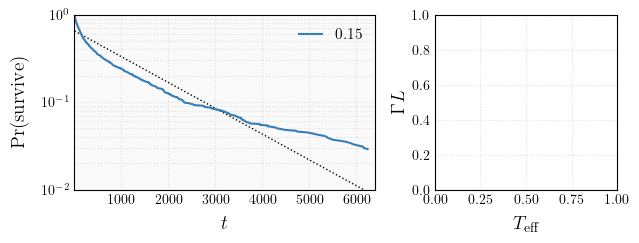

In [121]:
lmmax, lmmin = nTimeMAX, 0

fig, ax = plt.subplots(1, 2, figsize = (6.5,2.6), gridspec_kw={'width_ratios': [3.8, 2.3]})
gammas1 = np.zeros((len(tempList), 2))
cls = cycle(allcolors)

for tmp in range(len(tempList[:1])):
    temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, m2, temp])
    labss = r'${:.2f}$'.format(temp)

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    ndcys = maxSim - minSim
    decay_times = np.sort(decay_times[:,1])
    decay_times = decay_times[decay_times < lmmax]

    ax[0].fill_betweenx(np.linspace(-1,2,10), lmmin*dx, lmmax*dx, color='darkgray', alpha=0.05)

    frmin = [np.argmin(np.abs(decay_times - lmmax))]
    frmax = [np.argmin(np.abs(decay_times - lmmin))]
    frmin = survive_prob(decay_times, ndcys)[frmin]
    frmax = survive_prob(decay_times, ndcys)[frmax]

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    jfit_times   = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas1[tmp] = np.array([temp, -jfit_times[0]])

    col = next(cls)
    ax[0].plot(decay_times*dx, np.exp(get_line(decay_times, *jfit_times)), ls=':', lw=1, color='k')
    ax[0].plot(decay_times*dx, survive_prob(decay_times, ndcys), color=col, ls='-', label=labss)

ax[0].set_xlim(dx, lmmax*dx)
ax[0].set_ylim((1e-2,1))
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\rm Pr(survive)$')
ax[0].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$\Gamma L$')
ax[1].set_xlabel(r'$T_{\rm eff}$')
beautify(ax)
fig.tight_layout()
plt.savefig('./plots/decay_rate_and_surv_fraction.pdf')
plt.show()

In [120]:
#check this decay rate as a funciton of courrant number, lattice spacing and box size
#0.09, 0.095, 0.1
# decat time as tclock + len simulation
# test that the temeprature doesnt time evolve by looking at the effective 
# thermal mass evolution in time; for example can try with concate potential 
# check evolutoin of effective mass at various temepratures up to 0.6; and effective temperatures up to timescales 1e6
# try sinusoidal power spectrum in low k modes



/home/dpirvu/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-9.231496503128711e-07+0j)


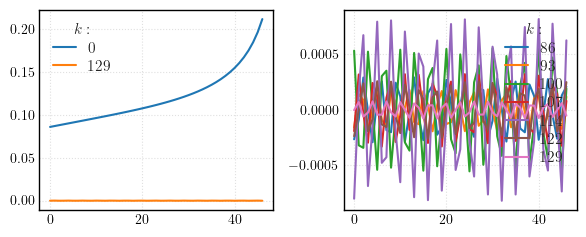

In [73]:
fftfld_intime = np.array([np.fft.fft(fld[tt,:], axis=-1)/nLat for tt in range(0, nT, 1)])
fftfld = np.nanmean(np.abs(fftfld_intime)**2., axis=0)
fftmom_intime = np.array([np.fft.fft(mom[tt,:], axis=-1)/nLat for tt in range(0, nT, 1)])
fftmom = np.nanmean(np.abs(fftmom_intime)**2., axis=0)

fig, ax = plt.subplots(1, 2, figsize = (6, 2.5))
for ki, kk in enumerate([0, nLat//2]):
    ax[0].plot(fftfld_intime[:, kk], label=r'${:.0f}$'.format(round(dk*kk,0)))
for ki, kk in enumerate(np.linspace(nLat//3, nLat//2, 7)):
    kk = int(kk)
    ax[1].plot(fftfld_intime[:, kk], label=r'${:.0f}$'.format(round(dk*kk,0)))
print(fftfld_intime[0, nLat//2])
ax = beautify(ax, ttl=r'$k:$')
plt.tight_layout(); plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


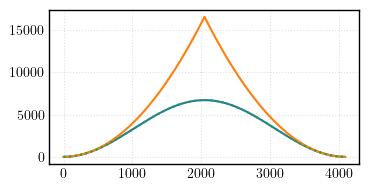

In [112]:
fig, ax = plt.subplots(1, 1, figsize = (4, 2.))
plt.plot(m2 + (2./dx**2.) * (1. - np.cos(klist * dx)))
plt.plot(m2 + klist**2.)
plt.plot(w2(m2), ls=':')
ax = beautify(ax)
plt.show()


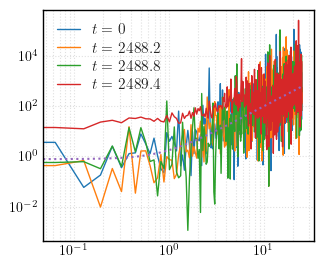

In [97]:
kmax = dk*nLat//10

fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))
fftfld = np.abs(np.fft.fft(initcond[0], axis=-1))**2.
fftmom = np.abs(np.fft.fft(initcond[1], axis=-1))**2.
plt.plot(klist[(klist>=0)&(klist<kmax)], (fftmom/fftfld)[(klist>=0)&(klist<kmax)], \
         ls='-', lw=1, label=r'$t=0$')

for tt in [0, nT//2, nT-1]:
    fftfld = np.abs(np.fft.fft(fld[tt,:], axis=-1))**2.
    fftmom = np.abs(np.fft.fft(mom[tt,:], axis=-1))**2.

    plt.plot(klist[(klist>=0)&(klist<kmax)], (fftmom/fftfld)[(klist>=0)&(klist<kmax)], \
             ls='-', lw=1, label=r'$t={:.1f}$'.format((tdecay + tt)*dtout))

plt.plot(klist[(klist>=0)&(klist<kmax)], w2(m2)[(klist>=0)&(klist<kmax)], ls=':')
plt.yscale('log')
plt.xscale('log')
ax = beautify(ax)
plt.show()

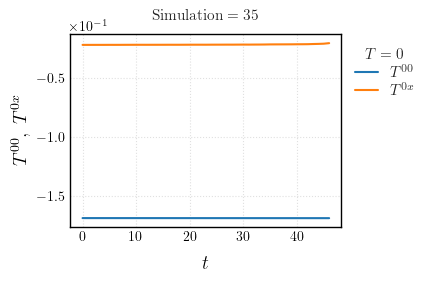

In [108]:
tlist = np.arange(len(energy_data))
emtcut = (EMT_data - init_EMT_data) / init_EMT_data
tencut = (TEN_data - init_TEN_data) / init_TEN_data

fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
ax.plot(tlist, tencut, label=r'$T^{00}$', ls='-')#, marker='o', ms=1)
ax.plot(tlist, emtcut, label=r'$T^{0x}$', ls='-')#, marker='o', ms=1)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
beautify(ax, bb=(1,1), ttl=r'$T={:.0f}$'.format(temp))
#ax.axvline(nLat, ls='-', color='k', lw=0.5)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[0.,0.])
plt.show()


(1000, 50)


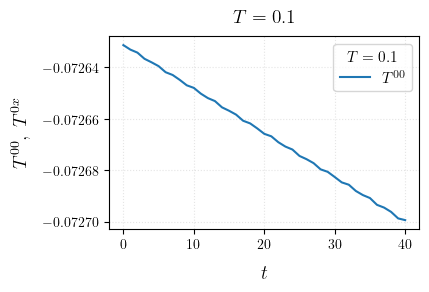

In [153]:
if True:
    for tmp in range(len(tempList)):
        temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))

        initial_conditions = np.load(init_cond_file(*exp_params, minSim, maxSim, nTimeMAX), allow_pickle=True)
        real_space_fld = initial_conditions[:,1]
        real_space_mom = initial_conditions[:,2]
        real_space_grd = initial_conditions[:,3]

        tlist = np.arange(50)
        print(np.shape(ALL_emt))

        fig, ax = plt.subplots(1,1, figsize = (4,2.5))
        for sim, (momentum, energy) in enumerate(zip(ALL_emt, ALL_toten)):
            if sim!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1
            tcut = tlist[:nnrg]
            emtcut, tencut = momentum[:nnrg], energy[:nnrg]

            indx = np.argwhere(initial_conditions[:,0] == sim)[0]
            initfld = initial_conditions[indx,1][0]
            initmom = initial_conditions[indx,2][0]
            initgrd = initial_conditions[indx,3][0]

            init_TEN_data = np.sum(0.5*initmom**2. + 0.5*initgrd**2. + V(initfld), axis=0)
            init_EMT_data = np.sum(initmom * initgrd, axis=-1)
            
            tencut = (tencut - init_TEN_data) / init_TEN_data
            emtcut = (emtcut - init_EMT_data) / init_EMT_data

            ax.plot(tcut, tencut, label=(r'$T^{00}$' if sim==0 else None))
           # ax.plot(tcut, emtcut, label=(r'$T^{0x}$' if sim==0 else None))

        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
        ax.legend(title=labs, bbox_to_anchor=(1.,1.))
        ax.grid(ls=':', color='darkgray', alpha=0.3)
        ax.set_title(labs)
        fig.show()

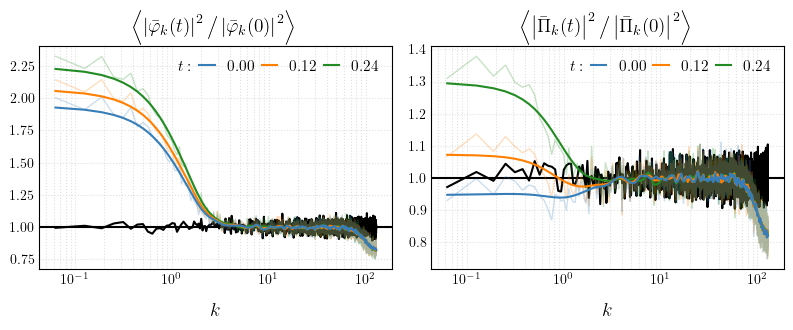

In [194]:
if True:
    clls = allcolors
    for tmp in range(len(tempList)):
        temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        # modes to plot:
        aa, bb = knyq//knyq, knyq-1
        # time steps to plot
        tslist = [0,5,10]
        tlist = np.arange(50)[tslist]

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, tslist, aa:bb]
        PSmom = ALL_powspec[:, 1, tslist, aa:bb]
        del ALL_powspec

        initial_conditions = np.load(init_cond_file(*exp_params, minSim, maxSim, nTimeMAX), allow_pickle=True)

        fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
        initcurve = np.mean(initial_conditions[:,4], axis=0)[aa:bb]
        ax[0].plot(klist[aa:bb], initcurve/pspec(temp,m2)[aa:bb], ls='-', color='k')

        initcurve = np.mean(initial_conditions[:,5], axis=0)[aa:bb]
        ax[1].plot(klist[aa:bb], initcurve/(w2(m2)*pspec(temp,m2))[aa:bb], ls='-', color='k')

        [aa.axhline(1., ls='-', color='k') for aa in ax]
        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind

            curve = np.nanmean(PSfld[:,tind], axis=0)
            curve/= pspec(temp,m2)[aa:bb]
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

            curve = np.nanmean(PSmom[:,tind], axis=0)
            curve/= (w2(m2)*pspec(temp,m2))[aa:bb]
            ax[1].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

        for tind, tt in enumerate(reversed(tlist)):
            tind  = len(tlist) - 1 - tind
            lab = r'${:.2f}$'.format(tt*dx)

            curve = np.nanmean(PSfld[:,tind], axis=0)
            curve/= pspec(temp,m2)[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)

            curve = np.nanmean(PSmom[:,tind], axis=0)
            curve/= (w2(m2)*pspec(temp,m2))[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            plt.plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)


        for aa in ax:
            h, l = aa.get_legend_handles_labels() # Extracting handles and labels
            h, l = h[::-1], l[::-1]
            handles = [aa.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, \
                            loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
        [aa.set_xscale('log') for aa in ax]
        [aa.set_xlabel(r'$k$') for aa in ax]
        ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
        beautify(ax, lens=False)
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


TypeError: <lambda>() missing 1 required positional argument: 'm'

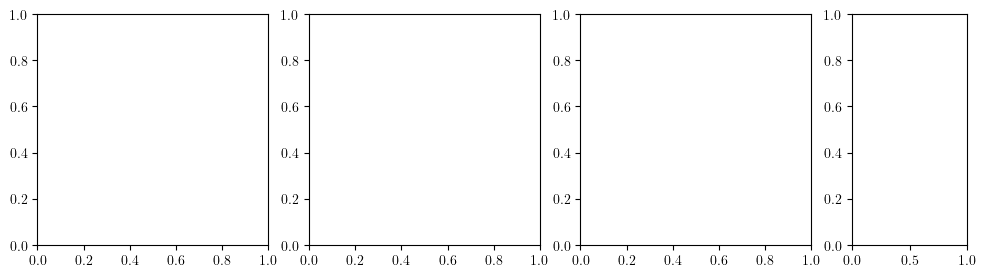

In [199]:
if True:
    fig, ax = plt.subplots(1, 4, figsize = (12,3.), gridspec_kw={'width_ratios': [2.,2.,2.,1.]})
    for tmp in range(len(tempList)):
        temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        indmax = np.arange(len(klist))[(klist>0.)&(klist<=3.3)][-1]
        # modes to plot:
        aa, bb = 0, indmax
        # time slices to average
        am, bm = -50, -1
        # time steps to plot
        tslist = [0,5,10]
        tlist = np.arange(50)[tslist]

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, am:bm, aa:bb]
        PSmom = ALL_powspec[:, 1, am:bm, aa:bb]
        del ALL_powspec

        avPSfld = np.nanmean(np.nanmean(PSfld, axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(PSmom, axis=1), axis=0)
        curve   = (avPSmom/avPSfld)

        w2m     = lambda ks, m: ks**2. + m**2.
        pofk_w2 = lambda ks, m: w2m(ks, m)

        ax[0].plot(klist[aa:bb], pofk_w2(klist[aa:bb],), ls='-', lw=1, color='k')#, label=lab0)

        ax[0].plot(klist[aa:bb], curve, ls='-', color=col)#, label=lab1)

        lab2 = r'$m_{\rm eff}/m=$'+r'${:.2f}$'.format(savemeff[tmp]) + r'$\newline$'
        ax[0].plot(klist[aa:bb], pofk_w2(klist[aa:bb], savemeff[tmp]), color='k', ls=':', lw=1, label=lab2)
        ax[0].legend(ncol=1, frameon=False, loc=2, handlelength=1)

        w2m_fld     = lambda ks, msq: ks**2. + msq
        pofk0_fld   = lambda ks, msq, te: norm / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk_fld    = lambda ks, msq, te: norm / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1_fld = lambda ks, te: np.abs(pofk_fld(ks, savemeff[tmp]**2., te))**2.
        f_pred2_fld = lambda ks, te: np.abs(pofk0_fld(ks, m2, te))**2.

        ax[1].plot(klist[aa:bb], f_pred2_fld(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[1].plot(klist[aa:bb], avPSfld, ls='-', color=col)#, label=lab1)

        ax[1].fill_between(klist[aa:bb], f_pred1_fld(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                         f_pred1_fld(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                         linewidth=0, color=col, alpha=0.2)
        ax[1].plot(klist[aa:bb], f_pred1_fld(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        pofk0   = lambda ks, msq, te: norm * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk    = lambda ks, msq, te: norm * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1 = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
        f_pred2 = lambda ks, te: np.abs(pofk0(ks, m2, te))**2.

        ax[2].plot(klist[aa:bb], f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[2].plot(klist[aa:bb], avPSmom, ls='-', color=col)#, label=lab1)

        ax[2].fill_between(klist[aa:bb], f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                         f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                         linewidth=0, color=col, alpha=0.2)
        ax[2].plot(klist[aa:bb], f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        
        l0, = ax[3].plot(klist[aa:bb], f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        l1, = ax[3].plot(klist[aa:bb], avPSmom, ls='-', color=col)#, label=lab1)

        l2  = ax[3].fill_between(klist[aa:bb], f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                               f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                               linewidth=0, color=col, alpha=0.2)
        l22,= ax[3].plot(klist[aa:bb], f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        lab0 = r'${\rm Initial \; conditions \;}$'
        lab1 = r'${\rm Late \; time \; data \;}$'
        lab2 = r'$T_{\rm eff}/m=$'+r'${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(save_teff_from_fld[tmp], \
                                                                             (save_teff_from_mom_upper_bound[tmp] - save_teff_from_fld[tmp]), \
                                                                             (save_teff_from_fld[tmp] - save_teff_from_mom_lower_bound[tmp]))
        leg = ax[3].legend([l0, l1, (l2, l22), ], [lab0, lab1, lab2], title=r'$T/m={:.1f}$'.format(temp), \
                           ncol=1, frameon=False, handlelength=1, loc='center')

        ax[0].set_ylabel(r'$\omega_k^2/m^2$')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[2].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')

        beautify(ax, lens=False)
        for ai, aa in enumerate(ax.flatten()[:3]):
            aa.axvline(klist[indmax+1], color='k', ls='-', lw=0.5)
            if ai>0: aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            aa.set_xscale('log')
            aa.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.savefig('./plots/flat_bestfit_masses.pdf')
        plt.show()


In [168]:
if False:
    fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
    camera = Camera(fig)
    nT, nN = np.shape(fld)
    for tind, tt in enumerate(np.arange(0, nT, 2)):

        ls = plt.plot(np.arange(nN)*dx, fld[tt], ls='-', color=allcolors[0], lw=1)
        ax.axhline(0., ls=':', color='k', lw=0.5)
        ax.set_xlabel(r'$r$')
        ax.set_ylabel(r'$\bar{\varphi}(r)$')
        beautify_anim(ax)
        plt.legend(ls, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1,\
                  frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        plt.tight_layout()
        camera.snap()
    animation = camera.animate(interval = 0.0001);
    animation.save('./plots/animation_simulation_unbounded.gif', writer = 'imagemagick')


In [170]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        # 0 for field; 1 for momentum 
        for find in [0,1]:
            # modes to plot:
            aa, bb = 1, knyq//5
            # time steps to plot
            tstep = 100
            # if tind not in np.array([0,2,7,27,46]): continue

            ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
            tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
            del ALL_powspec1

            fig, ax = plt.subplots(1,1, figsize = (5.,3.))

            if find==0: thps = pspec(tmp,m2,gg,temp)[aa:bb]
            elif find==1: thps = pspec(tmp,m2,gg,temp)[aa:bb]*w2(tmp,m2)[aa:bb]

            for tind, tt in enumerate(tlist):
                if tind==0: plt.plot(klist[aa:bb], thps, ls='-', color='k', lw=0.5)

                lab = r'${:.1f}$'.format(round(tt*dx,1))
                curve = np.nanmean(PSfld1[:,tind], axis=0)
                plt.plot(klist[aa:bb], curve, ls='-', lw=1, label=lab)

               # curve = gaussian_filter1d(curve, 4, mode='nearest')
               # plt.plot(klist[aa:bb], curve, ls='-')

            h, l = ax.get_legend_handles_labels() # Extracting handles and labels
            handles = [plt.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            beautify(ax)
            leg = ax.legend(handles, labels, ncol=len(tlist)+1, loc='lower left', frameon=False, handlelength=1., labelspacing=0.3, columnspacing=0.6)
            ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            ax.set_xscale('log')
            if find==0: ax.set_yscale('log')
            ax.set_ylabel([r'$\left\langle \left|\delta\bar{\varphi}_k(t)\right|^2 \right\rangle$',
                          r'$\left\langle \left|\delta\bar{\Pi}_k(t)\right|^2 \right\rangle$'][find])
            ax.set_xlabel(r'$k$')
            plt.tight_layout()
            plt.savefig('./plots/powespec_tevol.pdf')
            plt.show()


ValueError: not enough values to unpack (expected 6, got 5)

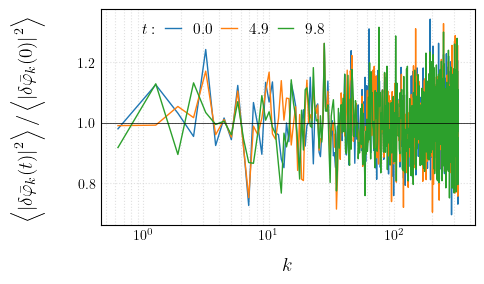

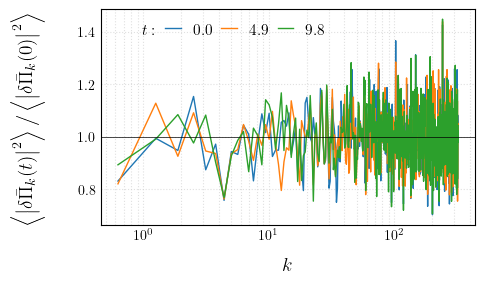

In [24]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        # 0 for field; 1 for momentum 
        for find in [0,1]:
            # modes to plot:
            aa, bb = 1, knyq-1
            # time steps to plot
            tstep = 100
            # if tind not in np.array([0,2,7,27,46]): continue

            ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
            tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
            del ALL_powspec1

            fig, ax = plt.subplots(1,1, figsize = (5.,3.))

            if find==0: thps = pspec(tmp,m2,gg,temp)[aa:bb]
            elif find==1: thps = pspec(tmp,m2,gg,temp)[aa:bb]*w2(tmp,m2)[aa:bb]

            for tind, tt in enumerate(tlist):
                curve = np.nanmean(PSfld1[:,tind], axis=0)

                lab = r'${:.1f}$'.format(round(tt*dx,1))
                plt.plot(klist[aa:bb], curve/thps, ls='-', lw=1, label=lab)

               # curve = gaussian_filter1d(curve, 4, mode='nearest')
               # plt.plot(klist[aa:bb], curve, ls='-')

            h, l = ax.get_legend_handles_labels() # Extracting handles and labels
            handles = [plt.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            beautify(ax)
            leg = ax.legend(handles, labels, ncol=len(tlist)+1, loc=2, frameon=False, handlelength=1., labelspacing=0.3, columnspacing=0.6)

            ax.set_xscale('log')
            ax.axhline(1, ls='-', color='k', lw=0.5)
            ax.set_ylabel([r'$\left\langle \left|\delta\bar{\varphi}_k(t)\right|^2 \right\rangle \Big/ \left\langle \left|\delta\bar{\varphi}_k(0)\right|^2 \right\rangle$',\
                          r'$\left\langle \left|\delta\bar{\Pi}_k(t)\right|^2 \right\rangle \Big/ \left\langle \left|\delta\bar{\Pi}_k(0)\right|^2 \right\rangle $'][find])
            ax.set_xlabel(r'$k$')
            plt.tight_layout()
            plt.savefig('./plots/powespec_normalized_tevol.pdf')
            plt.show()


In [66]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        tlist, enfld, emtfld = ALL_toten[0], ALL_toten[1], ALL_emt[1]

        for sim, (momentum, energy) in enumerate(zip(emtfld, enfld)):
            if sim%40!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            emtcut = (emtcut - emtcut[0]) / emtcut[0]
            tencut = (tencut - tencut[0]) / tencut[0]

            fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
            ax.plot(tcut, tencut, label=r'$T^{00}$', ls='-', marker='o', ms=1)
            ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-', marker='o', ms=1)

            ax.set_xlabel(r'$t$')
            ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
            ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
            beautify(ax, bb=(1,1), ttl=labl(gg, temp))
            plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/dpirvu/prefactor/x1024_g0.1000_m21.0000_T50.0000_minSim0_maxSim100_toten.npy'